<font color='seagreen'>


# Week 7 -- Condensation, Evaporation, Sublimation

*Please finish and submit this project before the start of class on 18 October 2017.*

Here, we'll be playing with some applications of phase transitions to planetary atmospheres. You will need some thermodynamic quantities, which you may wish to grab from the Pierrehumbert table in Wednesday's lecture slides, from Pierrehumbert's `phys.py` module from Week 02. You will also need some other quantities -- please look them up! I want you to develop expertise identifying and finding the information you need. 

<font color='seagreen'> 
### Q1: $H_2O$ on Earth

For this problem, you will want to be very conscious of the difference between total atmospheric pressure (which is about $1~bar$ at sea level) and partial pressure of $H_2O$ vapor (which on Earth will always be lower than the total atmospheric pressure). 
1. Plot the saturation vapor pressure curve for $H_2O$ on a $P-T$ diagram, where the $P$ axis represents the partial pressure of $H_2O$ in the atmosphere. Use the approximate solution to the Clausius-Clapeyron equation we saw in class, and use the appropriate latent heats for temperatures above and below the triple point. It will help to plot this "atmosphere-style", with low pressures on top.
1. The ATOC Department has a weather station on the roof of the Duane Physics building. [Go check out the weather](http://foehn.colorado.edu/weather/atoc1/). Pick any moment in time where you can find data from this weather station, either from today or from a moment in the archive. Write down the date, time, temperature, dew point, and total atmospheric pressure.
1. Plot your moment in time on your water phase diagram. You will need to do a calculation to determine the partial pressure of water in the atmosphere.
1. What is the mixing ratio of water vapor in the atmosphere at your moment? (That is, what fraction of the total number of air molecules are water molecules?)
1. If this mixing ratio remained constant as you moved upwards from the roof of Duane, at what total atmospheric pressure level would you expect condensation to start (if any)? Moving upwards, you can assume the atmosphere follows a dry adiabat for Earth until you reach the altitude where condensation would start to kick in (and therefore change to the moist adiabat). 
1. Would the clouds that form likely be made of liquid droplets or ice crystals?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy import units as u
from astropy import constants as const
%matplotlib inline

Relative Humidity is 0.5132135061387889
Partial Pressure of Water Vapor is 0.43279294972684074 bar
Mixing Ratio of Water Vapor is 0.00693578476434281
Current Saturation Pressure (where liquid clouds condense) is 0.011396713496056268 bar


/home/gmduvvuri/miniconda3/envs/astroconda/lib/python3.5/site-packages/astropy/units/quantity.py:641: RuntimeWarning: divide by zero encountered in true_divide
  *arrays, **kwargs)


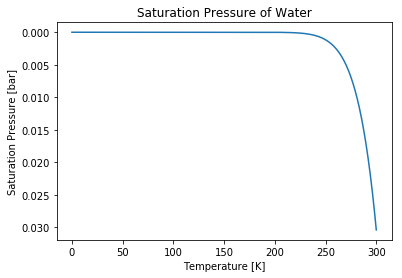

In [8]:
def get_saturation_pressure(temp, latent_heat, specific_gas_const, ref_sat_pressure, ref_temp):
    exp_factor = ((-latent_heat/specific_gas_const)*((1.0/temp) - (1.0/ref_temp)))
    return (ref_sat_pressure*np.exp(exp_factor)).to(u.bar)

latent_vap_h20 = 2260000.0*(u.J/u.kg)
specific_gas_const_h20 = 461.5*(u.J/(u.kg*u.K))
temps = np.linspace(0.0, 300.0, 1000)*u.K
ref_temp_h20 = 273.16*u.K
ref_sat_pressure_h20 = (611.657*u.Pa).to(u.bar)
sat_pressure_h20 = get_saturation_pressure(temps, latent_vap_h20, specific_gas_const_h20, ref_sat_pressure_h20, ref_temp_h20)
plt.plot(temps, sat_pressure_h20)
plt.xlabel('Temperature [K]')
plt.ylabel('Saturation Pressure [bar]')
plt.title('Saturation Pressure of Water')
plt.gca().invert_yaxis()
#Current time+date = 1756 23 Oct 2017
dew_point = 272.48*u.K
current_temp = 282.9833*u.K
current_pressure = 0.8433*u.bar
sat_press_dew = get_saturation_pressure(dew_point, latent_vap_h20, specific_gas_const_h20, ref_sat_pressure_h20, ref_temp_h20)
sat_press_current = get_saturation_pressure(current_temp, latent_vap_h20, specific_gas_const_h20, ref_sat_pressure_h20, ref_temp_h20)
humidity = sat_press_dew/sat_press_current
print('Relative Humidity is', humidity)
partial_h20 = humidity*current_pressure
print('Partial Pressure of Water Vapor is', partial_h20)
mixing_h20 = sat_press_dew/current_pressure
print('Mixing Ratio of Water Vapor is', mixing_h20)
print("Current Saturation Pressure (where liquid clouds condense) is", sat_press_current)

<font color='seagreen'>
### Q2: ${CO}_2$ on Mars

The Martian poles regulate the whole planet's atmospheric pressure. The surface pressure on Mars, as measured by numerous landers and rovers is approximately $7~mbars$. Since the Martian atmosphere is made almost entirely out of ${CO}_2$, and the polar temperatures are near the ${CO}_2$ freezing point, it is not unreasonable to assume that the poles and atmosphere are in a solid-vapor equilibrium.

1. Given a surface pressure of $7~mbars$, at what temperature must the poles be in order to be in solid-vapor equilibrium? You can think of this as the temperature of the ${CO}_2$ frost dew point, where the relative "humidity" of ${CO}_2$ frost would be 100% and ${CO}_2$ frost would precipitate out of the atmosphere. 
+ Assume that CO2 frost grows at a given pole only during winter darkness, for roughly 1/4 of the Martian year. Assume the temperature at the poles remains fixed at the temperature you solved for in (1). How thick does the ${CO}_2$ ice grow? Hint -- think about the energy balance here: there's no sunlight but the poles can cool to space via emission of thermal radiation. This radiated energy needs to be compensated by latent heat released by ${CO}_2$ vapor freezing into ice (the reverse of sublimation). Neglect any greenhouse warming from the ${CO}_2$ above the surface.
+ Since ${CO}_2$ frost is precipitating out of an all ${CO}_2$ atmosphere, this will cause a  drop in the surface pressure. Assuming the frost forms uniformly between $70^\circ$ and $90^\circ$  North latitude, determine by how much the frost deposited during one hemispheric winter would lower the total atmospheric pressure. (You may need 



<font color='seagreen'> 

### Q3: Swamp Cooler

I cool my house with a [swamp cooler](https://en.wikipedia.org/wiki/Evaporative_cooler). It is a basically a fan that pulls outside air into the house, but forces it to pass through a saturated wet sponge along the way. Water from the sponge evaporates, converting sensible heat into latent heat of vaporization. 
1. If the outside air were $30~C$, what is the coolest temperature possible for the air blowing out of the swamp cooler and into my house? You can assume the outside air is perfectly dry (RH=0%) and the incoming air is totally saturated (RH=100%). I live at $1900~m$ altitude.
1. Why is a swamp cooler more effective at cooling a house in Colorado than it would be in Florida?